### loads the data file

In [41]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Text Preprocessing
import nltk
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

pd.set_option('display.max_colwidth',10000)
path = 'D:/IC/AIB/P1/subscriptionsdataFINAL.textile'
df = pd.read_csv(path)


## cleanse subscription data and add attributes.

In [42]:
import datetime
#Calculate age
df['Age'] = 2019-df['BirthYear']
#check membership status
#fill null end date as today
df['Status'] = [(1 if str(date) == 'nan' else 0) for date in df['End Date']]
df['End Date'] = [('Aug-19' if str(date) == 'nan' else date) for date in df['End Date']]

In [43]:
#Cleanse join date and end date
dic_month = {'Jan': "1", 'Feb': "2",'Mar': "3", 'Apr': "4",'May': "5", 'Jun': "6",'Jul': "7", 'Aug': "8",'Sep': "9", 'Oct': "10",'Nov': "11", 'Dec': "12"}
df['Join Month']=df['Join Date'].str.split('-').str[0]
df = df.replace({'Join Month':dic_month})
df['Join Year']= '20'+df['Join Date'].str.split('-').str[1]
df['Join_new']=df['Join Month']+'/'+df['Join Year']

df['End Month']=df['End Date'].str.split('-').str[0]
df = df.replace({'End Month':dic_month})
df['End Year']= '20'+df['End Date'].str.split('-').str[1]
df['End_new']=df['End Month']+'/'+df['End Year']


In [45]:
import datetime as dt
#Calculate the membership duration
df['Join_new1'] = pd.to_datetime(df['Join_new'],format = '%m/%Y')
df['End_new1'] = pd.to_datetime(df['End_new'],format = '%m/%Y')
df['End Date'] = [('Aug-19' if str(date) == 'nan' else date) for date in df['End Date']]
df['period'] = df['End_new1'] - df['Join_new1']
df['period'] = df['period'].apply(lambda x:x.days)


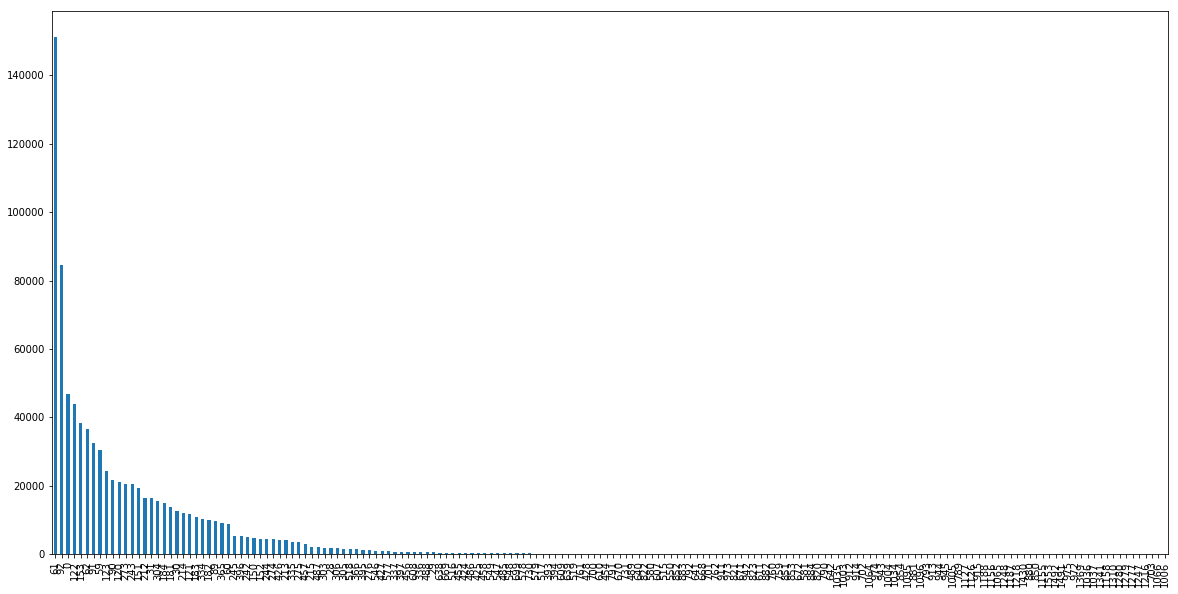

count    850033.000000
mean        134.942423
std         109.110657
min           0.000000
25%          61.000000
50%          92.000000
75%         182.000000
max        1553.000000
Name: period, dtype: float64

In [46]:
# duration
plt.figure(figsize=(20,10))
df['period'].value_counts().plot.bar()
plt.show()
df['period'].describe()

## 75% customer's membership are within 6months.

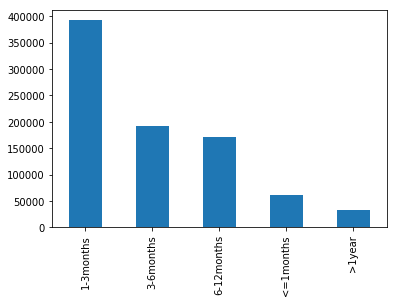

850033

In [206]:
# cut membership in bins
df['period group']=pd.cut(x=df['period'], bins=[-float("inf"),30,92,182,365,float("inf")],labels=['<=1months', '1-3months','3-6months', '6-12months','>1year'])

df['period group'].value_counts().plot.bar()
plt.show()
#df.info()
df['period group'].value_counts().sum()

In [48]:
df['Club'].unique()

array(['Enfield', 'Greenwich', 'Islington', 'Hounslow', 'Barnet',
       'Harrow', 'Brent', 'Wandsworth', 'Haringey', 'Waltham Forest',
       'Ealing', 'Lambeth', 'Tower Hamlets', 'Hackney', 'Southwark',
       'Camden', 'Sutton', 'Richmond upon Thames', 'Kingston upon Thames',
       'Bromley', 'Hammersmith', 'Barking', 'Westminster', 'Croydon',
       'Havering', 'Lewisham', 'Merton', 'Kensington and Chelsea',
       'Hillingdon', 'Newham', 'Redbridge', 'Bexley'], dtype=object)

In [49]:
#replace Affluence with indicators
dic_aff = {'A': "0.96", 'B': "0.73",'C1': "0.45", 'C2': "0.25",'DE': "0.1"}
df = df.replace({'Affluence':dic_aff})

In [50]:
#replace Gender with indicators, 0 as Male and 1 as Female
dic_gen = {'Male': "0", 'Female': "1"}
df = df.replace({'Gender':dic_gen})

In [51]:
#replace Subscription Type with indicators, 0 as Standard and 1 as Felexible
dic_sub = {'Standard': "0", 'Flexible': "1"}
df = df.replace({'Subscription Type':dic_sub})

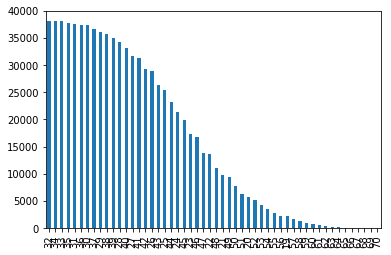

count    850033.000000
mean         35.230905
std           7.966825
min          19.000000
25%          29.000000
50%          35.000000
75%          41.000000
max          70.000000
Name: Age, dtype: float64

In [52]:
# Age 
df['Age'].value_counts().plot.bar()
plt.show()
df['Age'].describe()

## 75% customer are below 40years old. 

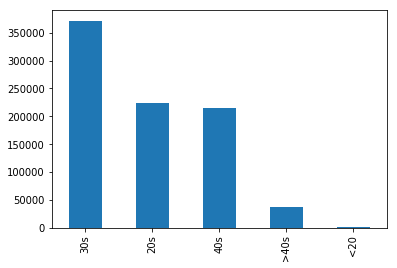

850033

In [207]:
#cut ages into bins
df['Age group']=pd.cut(x=df['Age'], bins=[-float("inf"),19, 29, 39, 49,float("inf")],labels=['<20','20s', '30s', '40s','>40s'])
df['Age group'].value_counts().plot.bar()
plt.show()
df['Age group'].value_counts().sum()

In [54]:
df.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Age,Status,...,Join Year,Join_new,End Month,End Year,End_new,Join_new1,End_new1,period,period group,Age group
0,Enfield,Dec-11,0.45,0,0,Dec-11,1,1992,27,0,...,2011,12/2011,12,2011,12/2011,2011-12-01,2011-12-01,0,<=1months,20s
1,Greenwich,Jun-18,0.96,1,0,Aug-19,2,1972,47,1,...,2018,6/2018,8,2019,8/2019,2018-06-01,2019-08-01,426,>1year,40s
2,Islington,Mar-18,0.73,1,0,Oct-18,3,1985,34,0,...,2018,3/2018,10,2018,10/2018,2018-03-01,2018-10-01,214,6-12months,30s
3,Hounslow,Oct-15,0.45,1,0,Dec-15,4,1972,47,0,...,2015,10/2015,12,2015,12/2015,2015-10-01,2015-12-01,61,1-3months,40s
4,Barnet,May-15,0.25,0,0,Dec-15,5,1982,37,0,...,2015,5/2015,12,2015,12/2015,2015-05-01,2015-12-01,214,6-12months,30s


In [55]:
#drop the redundant columns
drop_columns = ['Join Date', 'End Date', 'Join Month', 'Join Year','Age','BirthYear','Join_new', 'End Month', 'End Year', 'End_new','period','Join_new1','End_new1']
df1 = df.drop(drop_columns,axis=1)
df1.head()


,Club,Affluence,Gender,Subscription Type,CustomerID,Status,period group,Age group
0,Enfield,0.45,0,0,1,0,<=1months,20s
1,Greenwich,0.96,1,0,2,1,>1year,40s
2,Islington,0.73,1,0,3,0,6-12months,30s
3,Hounslow,0.45,1,0,4,0,1-3months,40s
4,Barnet,0.25,0,0,5,0,6-12months,30s


## Process Visit data

In [22]:
visitation_data_part1 = pd.read_csv('D:/IC/AIB/p1/visitationdataPART1.csv',parse_dates=['visitdate'])
visitation_data_part2 = pd.read_csv('D:/IC/AIB/p1/visitationdataPART2.csv', parse_dates=['visitdate'])

In [23]:
visitation_data = pd.concat((visitation_data_part1,visitation_data_part2))

In [28]:
visitation_data.head()

39514576

In [208]:
#calculate the total visit by each customer
visit_count = visitation_data.groupby(by='CustomerID').count()['TimeofVisit']

In [209]:
visit_count.head()

CustomerID
1     20
2     74
3    165
4     52
5     93
Name: TimeofVisit, dtype: int64

In [79]:
#Merge clients and visit data
df2 = df1.join(visit_count,on='CustomerID')
df2.head()

,Club,Affluence,Gender,Subscription Type,CustomerID,Status,period group,Age group,TimeofVisit
0,Enfield,0.45,0,0,1,0,<=1months,20s,20.0
1,Greenwich,0.96,1,0,2,1,>1year,40s,74.0
2,Islington,0.73,1,0,3,0,6-12months,30s,165.0
3,Hounslow,0.45,1,0,4,0,1-3months,40s,52.0
4,Barnet,0.25,0,0,5,0,6-12months,30s,93.0


## analyze churn rate from a variaty of customer demographics

In [155]:
churn_club = pd.DataFrame(columns = ["member", "nonmember", "churn rate"])
churn_club['member'] = df1.loc[df['Status']==1].groupby('Club').count()['Status']
churn_club['nonmember'] = df1.loc[df['Status']==0].groupby('Club').count()['Status']
churn_club['churn rate'] = churn_club['nonmember'] / (churn_club['nonmember']+churn_club['member'])

## Houslow has the highest churn rate and redbridge has the lowest

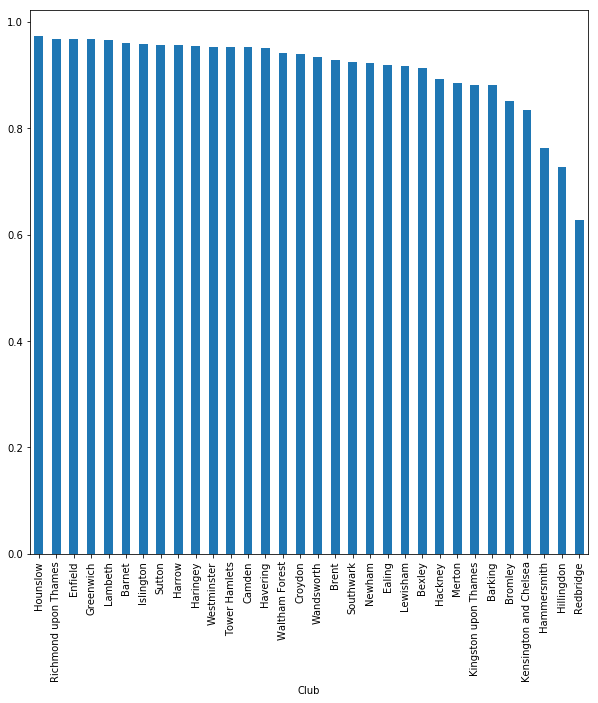

In [180]:
churn_club['churn rate'].sort_values(ascending=False).plot.bar(figsize=(10,10))

## We do not see a big difference among affluence groups

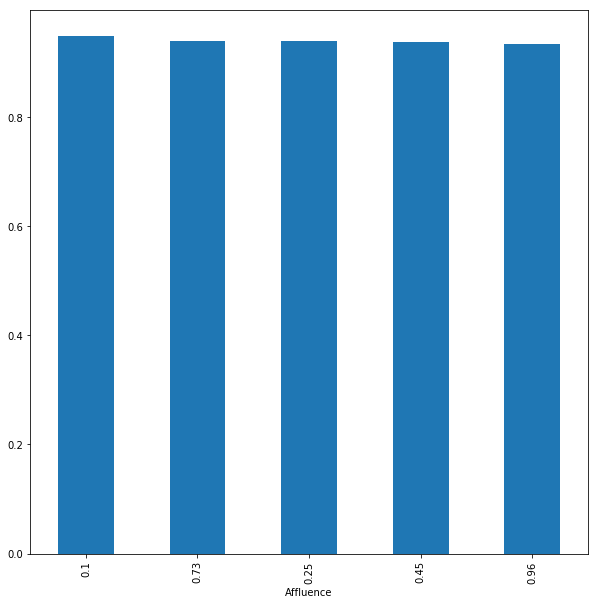

In [189]:
churn_aff = pd.DataFrame(columns = ["member", "nonmember", "churn rate"])
churn_aff['member'] = df1.loc[df['Status']==1].groupby('Affluence').count()['Status']
churn_aff['nonmember'] = df1.loc[df['Status']==0].groupby('Affluence').count()['Status']
churn_aff['churn rate'] = churn_aff['nonmember'] / (churn_aff['nonmember']+churn_aff['member'])
churn_aff['churn rate'].sort_values(ascending=False).plot.bar(figsize=(10,10))

## Males are slightly more likely to churn than women

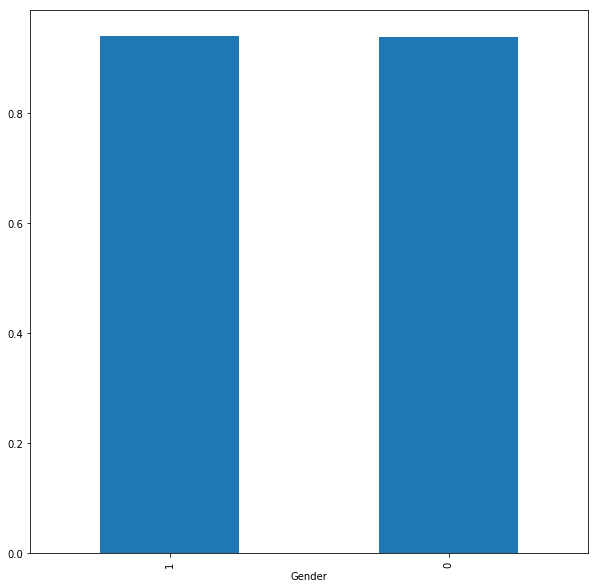

In [190]:
churn_gen = pd.DataFrame(columns = ["member", "nonmember", "churn rate"])
churn_gen['member'] = df1.loc[df['Status']==1].groupby('Gender').count()['Status']
churn_gen['nonmember'] = df1.loc[df['Status']==0].groupby('Gender').count()['Status']
churn_gen['churn rate'] = churn_gen['nonmember'] / (churn_gen['nonmember']+churn_gen['member'])
churn_gen['churn rate'].sort_values(ascending=False).plot.bar(figsize=(10,10))

## Churn rate are decreasing with longer membership duration

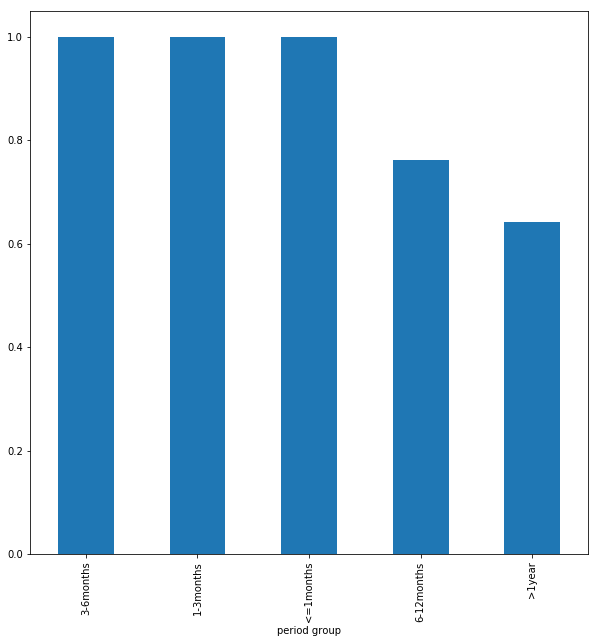

In [192]:
churn_per = pd.DataFrame(columns = ["member", "nonmember", "churn rate"])
churn_per['member'] = df1.loc[df['Status']==1].groupby('period group').count()['Status']
churn_per['nonmember'] = df1.loc[df['Status']==0].groupby('period group').count()['Status']
churn_per['churn rate'] = churn_per['nonmember'] / (churn_per['nonmember']+churn_per['member'])
churn_per['churn rate'].sort_values(ascending=False).plot.bar(figsize=(10,10))


## Older members are more likely to churn

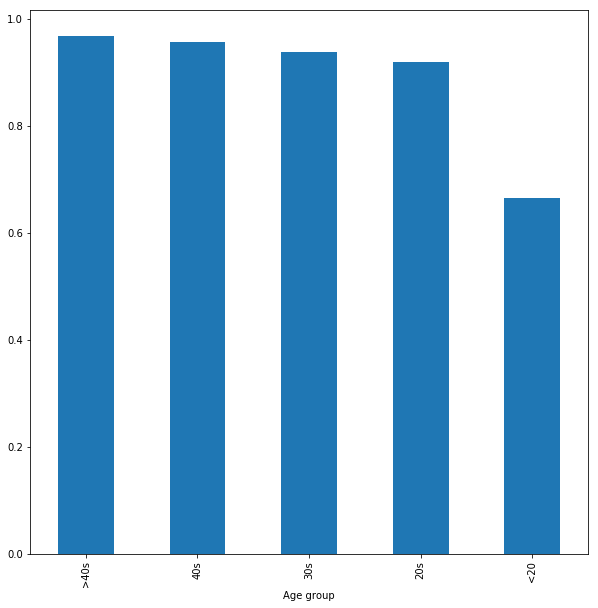

In [195]:
churn_age = pd.DataFrame(columns = ["member", "nonmember", "churn rate"])
churn_age['member'] = df1.loc[df['Status']==1].groupby('Age group').count()['Status']
churn_age['nonmember'] = df1.loc[df['Status']==0].groupby('Age group').count()['Status']
churn_age['churn rate'] = churn_age['nonmember'] / (churn_age['nonmember']+churn_age['member'])
churn_age['churn rate'].sort_values(ascending=False).plot.bar(figsize=(10,10))
